<a href="https://colab.research.google.com/github/RahulDhinakaran/Data_Science_Projects/blob/main/Multi_Linear_Regression_for_ToyotaCorolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Consider only the below columns and prepare a prediction model for predicting Price.**

In [4]:
from google.colab import files
upload=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [5]:
import numpy as np
import pandas as pd
df=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
list(df)

['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [7]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
df1=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'Mfg_Month'}>,
        <Axes: title={'center': 'Mfg_Year'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Met_Color'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Quarterly_Tax'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Mfr_Guarantee'}>,
        <Axes: title={'center': 'BOVAG_Guarantee'}>,
        <Axes: title={'center': 'Guarantee_Period'}>],
       [<Axes: title={'center': 'ABS'}>,
        <Axes: title={'center': 'Airbag_1'}>,
        <Axes: title={'center': 'Airbag_2'}>,
        <Axes: title={'center': 'Airco'}>

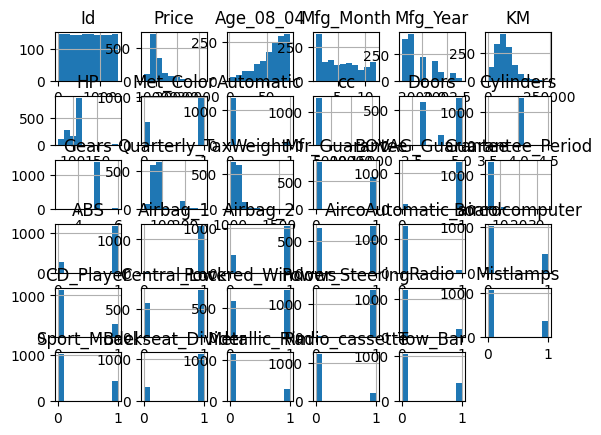

In [10]:
df.hist()

In [11]:
import pandas as pd
df.kurt()

<ipython-input-11-a0508b5f036d>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


Id                   -1.198935
Price                 3.737781
Age_08_04            -0.076632
Mfg_Month            -1.053692
Mfg_Year              0.070573
KM                    1.685057
HP                    8.836434
Met_Color            -1.443961
Automatic            13.058597
cc                  930.711227
Doors                -1.874765
Cylinders             0.000000
Gears                37.703476
Quarterly_Tax         4.298345
Weight               19.362901
Mfr_Guarantee        -1.866745
BOVAG_Guarantee       4.710535
Guarantee_Period     45.895434
ABS                   0.593902
Airbag_1             29.326794
Airbag_2             -1.007861
Airco                -2.001670
Automatic_airco      12.837003
Boardcomputer        -1.187585
CD_Player            -0.143217
Central_Lock         -1.897108
Powered_Windows      -1.940155
Power_Steering       40.041251
Radio                 2.020588
Mistlamps            -0.761044
Sport_Model          -1.239494
Backseat_Divider     -0.347145
Metallic

In [12]:
df.skew()

<ipython-input-12-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Id                   0.000789
Price                1.703885
Age_08_04           -0.826702
Mfg_Month            0.290661
Mfg_Year             0.911304
KM                   1.015912
HP                   0.955836
Met_Color           -0.747029
Automatic            3.878197
cc                  27.431793
Doors               -0.076395
Cylinders            0.000000
Gears                2.283960
Quarterly_Tax        1.993834
Weight               3.108639
Mfr_Guarantee        0.368588
BOVAG_Guarantee     -2.589204
Guarantee_Period     5.838435
ABS                 -1.610303
Airbag_1            -5.593385
Airbag_2            -0.996767
Airco               -0.033466
Automatic_airco      3.849562
Boardcomputer        0.902259
CD_Player            1.362712
Central_Lock        -0.324863
Powered_Windows     -0.250099
Power_Steering      -6.479621
Radio                2.004439
Mistlamps            1.113561
Sport_Model          0.873060
Backseat_Divider    -1.285823
Metallic_Rim         1.465019
Radio_cass

In [13]:
# Standardization
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
df1["Price"] =pd.DataFrame(MM.fit_transform(df1[["Price"]]))
df1["Price"]

<ipython-input-13-38fdcb53dd81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Price"] =pd.DataFrame(MM.fit_transform(df1[["Price"]]))


0       0.325044
1       0.333925
2       0.341030
3       0.376554
4       0.333925
          ...   
1431    0.111901
1432    0.230728
1433    0.147425
1434    0.103020
1435    0.092362
Name: Price, Length: 1436, dtype: float64

In [14]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<ipython-input-15-c89fee86e733>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


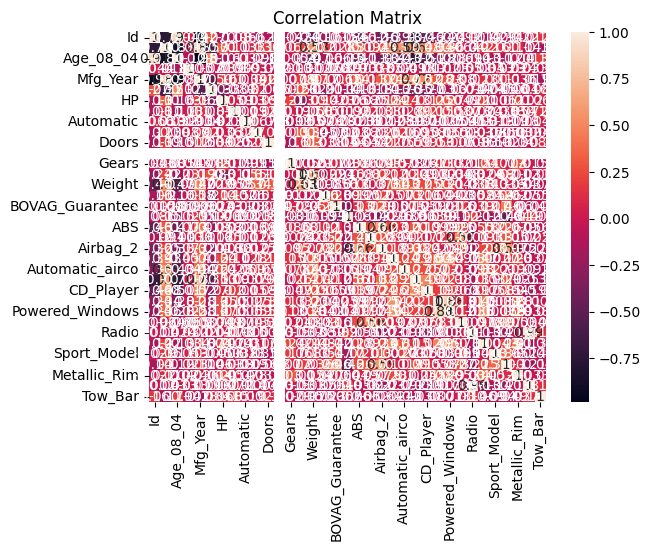

In [15]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

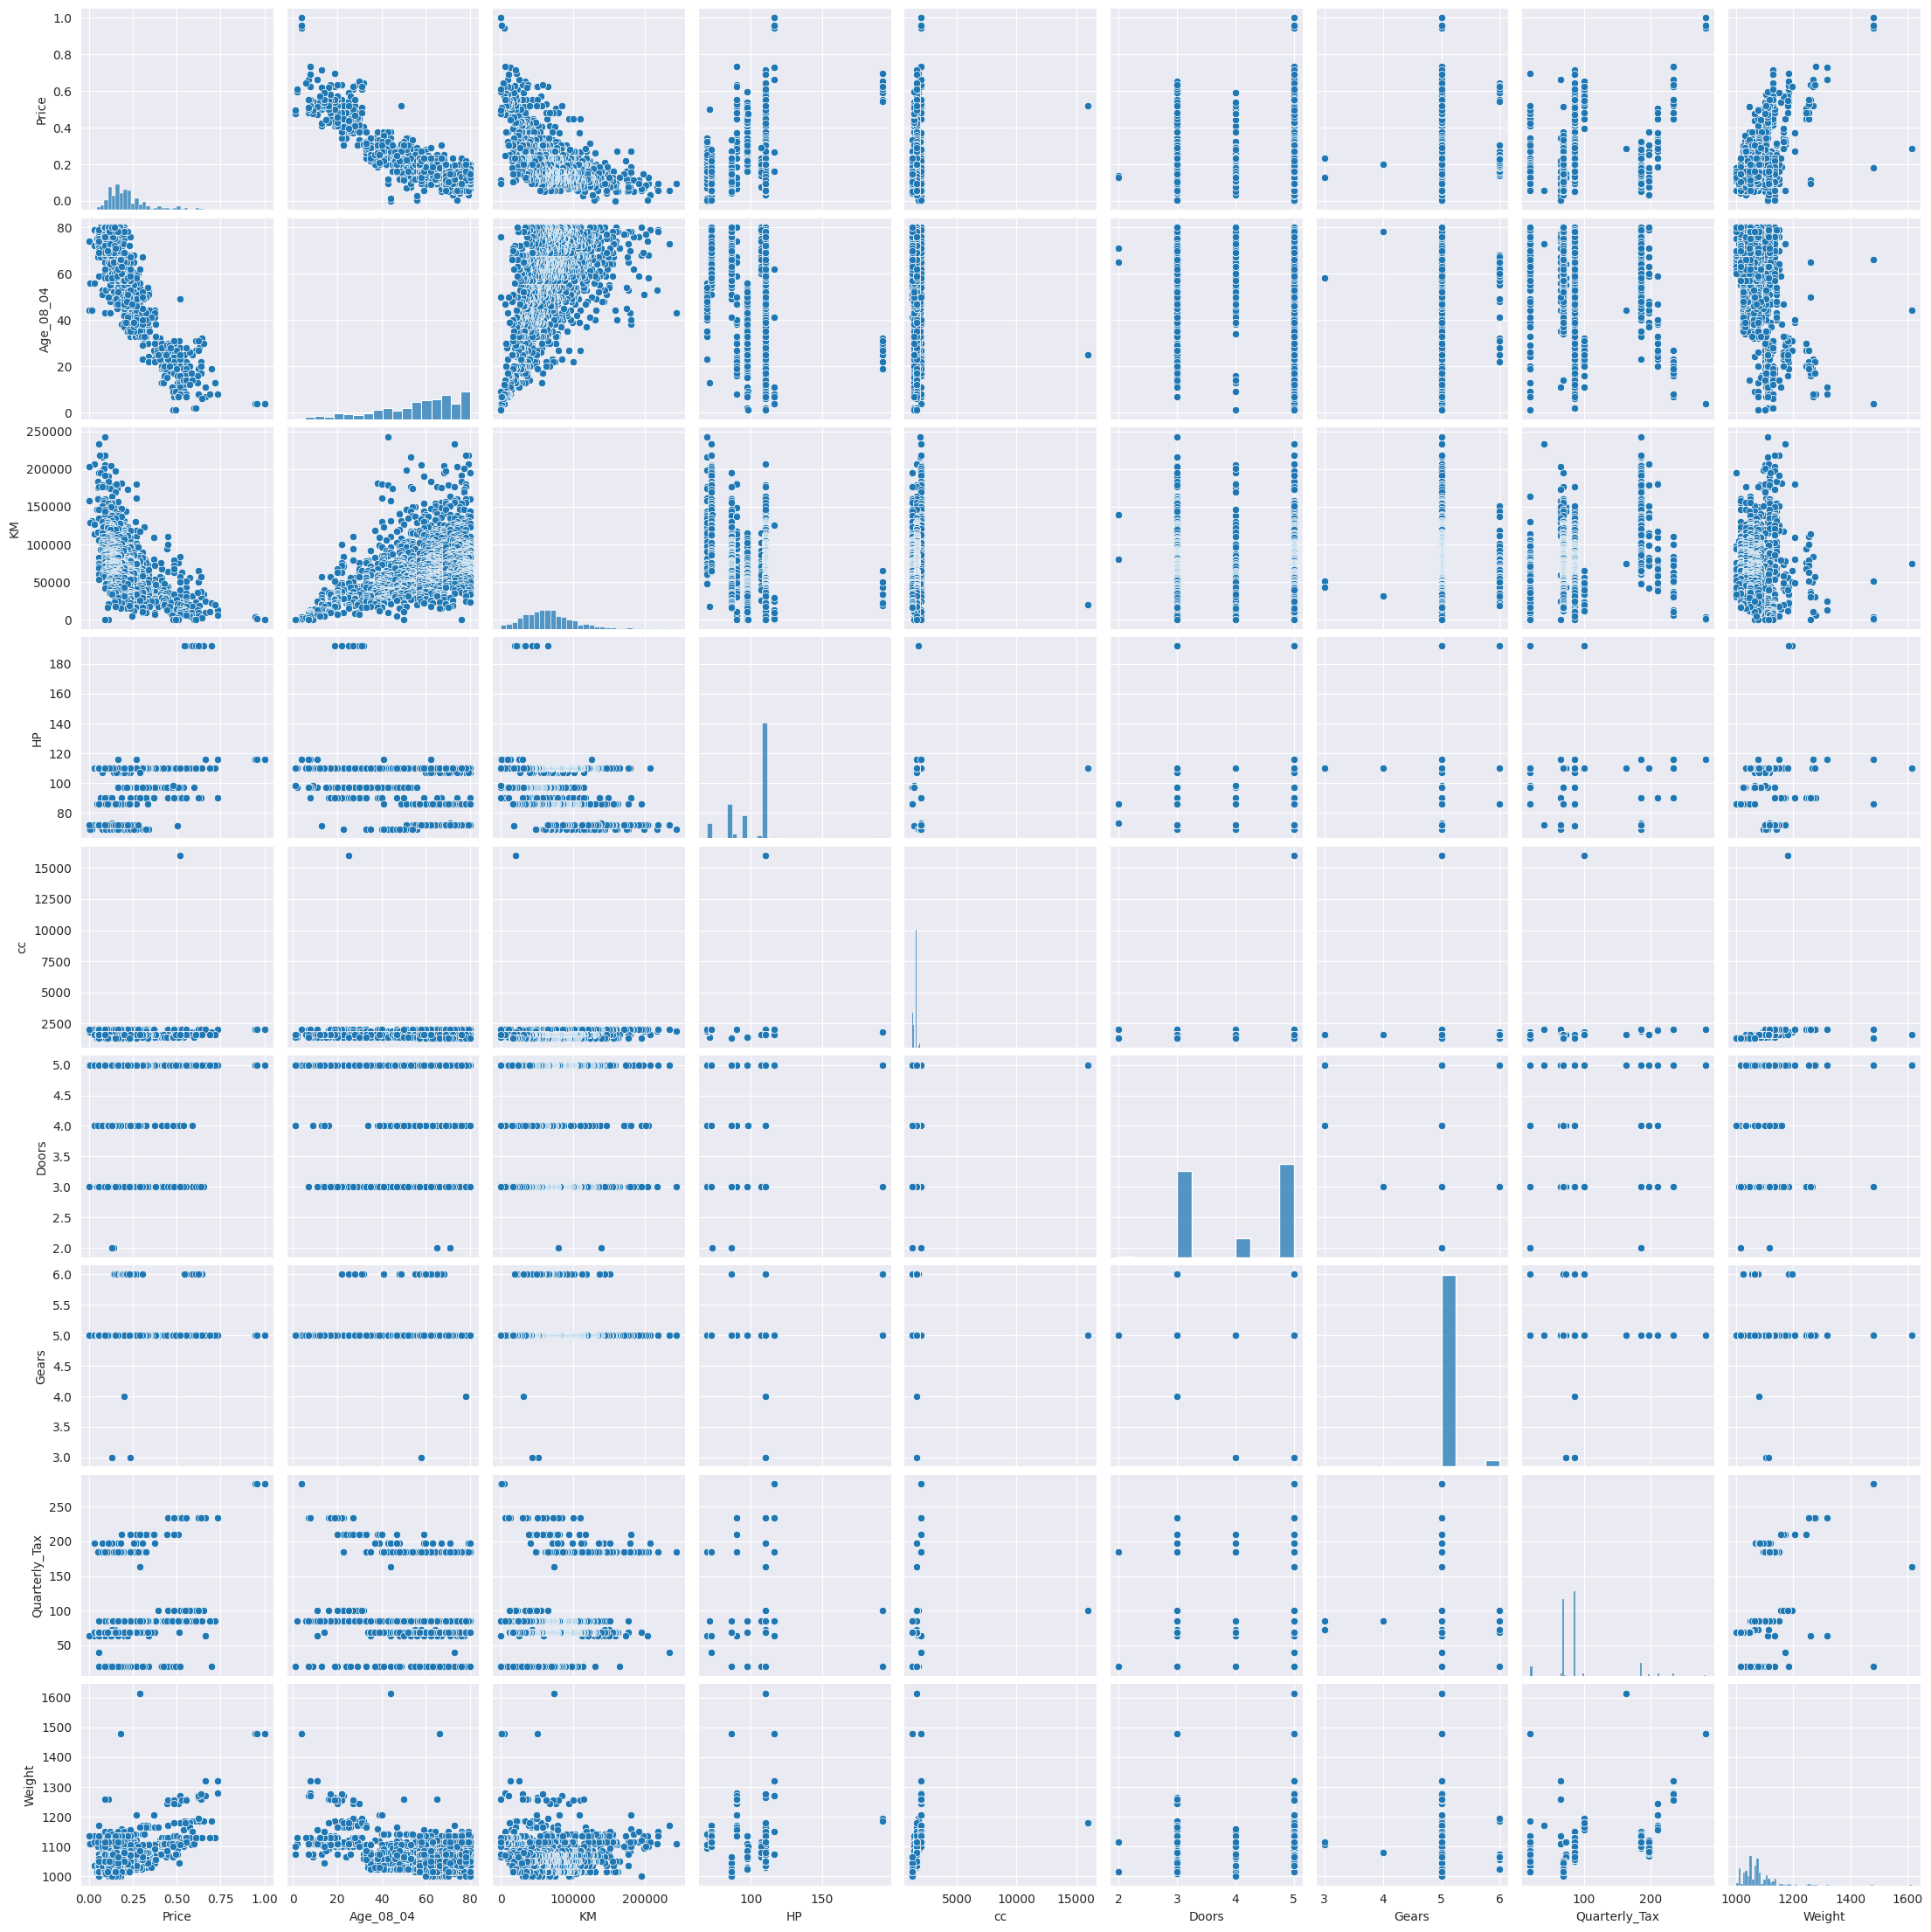

In [16]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df1)

In [17]:
# Split the variables X and Y
Y = df1["Price"]
#X =df1[['Age_08_04']]
#X =df1[['Age_08_04','Weight']]
#X =df1[['Age_08_04','Weight','KM']]
X =df1[['Age_08_04','Weight','KM','HP']]                     ### Best model fit
#X =df1[['Age_08_04','Weight','KM','HP','Quarterly_Tax']]
#X =df1[['Age_08_04','Weight','KM','HP','Quarterly_Tax','Doors']]
Y
X

,Age_08_04,Weight,KM,HP
0,23,1165,46986,90
1,23,1165,72937,90
2,24,1165,41711,90
3,26,1165,48000,90
4,30,1170,38500,90
...,...,...,...,...
1431,69,1025,20544,86
1432,72,1015,19000,86
1433,71,1015,17016,86
1434,70,1015,16916,86


In [18]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [19]:
LR.coef_
LR.intercept_

-0.2971453560373412

In [20]:
Y_pred=LR.predict(X)
Y_pred

array([0.43357531, 0.41546277, 0.432908  , ..., 0.14269887, 0.14711767,
       0.22376169])

In [21]:
#model building
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [22]:
#Neural Networks with Keras:

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Initialize the neural network model
nn_model = Sequential()

# Add layers to the model
nn_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(units=3, activation='softmax'))

# Compile the model
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
nn_model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test_categorical)
print(f"Neural Network Accuracy: {nn_accuracy:.2f}")


Epoch 1/50
4/4 [==============================] - 1s 87ms/step - loss: 0.9425 - accuracy: 0.6574 - val_loss: 0.9127 - val_accuracy: 0.7500
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 0.8859 - accuracy: 0.7778 - val_loss: 0.8855 - val_accuracy: 0.5833
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.8419 - accuracy: 0.6759 - val_loss: 0.8602 - val_accuracy: 0.5833
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.8013 - accuracy: 0.7222 - val_loss: 0.8277 - val_accuracy: 0.5833
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.7626 - accuracy: 0.6759 - val_loss: 0.7932 - val_accuracy: 0.5833
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.7343 - accuracy: 0.6667 - val_loss: 0.7734 - val_accuracy: 0.5833
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.7060 - accuracy: 0.6667 - val_loss: 0.7463 - val_accuracy: 0.5833
Epoch 8/50
4/4 [===========

In [26]:
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
gb_predictions = gb_model.predict(X_test)

# Calculate the accuracy of the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Gradient Boosting Accuracy: 1.00


In [27]:
#Support Vector Machines (SVM):

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)

# Calculate the accuracy of the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")


SVM Accuracy: 1.00


In [28]:
# Handling Missing Data:
import pandas as pd

# Drop rows with missing values
df.dropna(axis=0, inplace=True)

# Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)


<ipython-input-28-e70b9e834451>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [29]:
#Outlier Detection and Removal:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]



<ipython-input-29-ad48b86d5829>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-29-ad48b86d5829>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-29-ad48b86d5829>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [30]:
#Cross-Validation:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)


In [31]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("Mean Squared Error:",mse.round(4))

Mean Squared Error: 0.0023


In [32]:
print("Root Mean Squared Error:",np.sqrt(mse).round(4))

Root Mean Squared Error: 0.0479


In [33]:
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("r2_score:",r2.round(4))

r2_score: 0.8618


### **Improving the model by Data cleaning**

In [34]:
import statsmodels.api as sm

# Assuming y is your endogenous variable and X is your exogenous variable
# y and X are assumed to be NumPy arrays or pandas DataFrame/Series objects

# Add a constant to the exogenous variables (this is necessary for statsmodels)
X = sm.add_constant(X)

# Create a model with endogenous and exogenous variables
model = sm.OLS(y, X)  # OLS stands for Ordinary Least Squares, a method for estimating the parameters of a linear regression model

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           8.46e-83
Time:                        05:35:15   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1865      0.205      0.910      0.3

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = df1[['Age_08_04','Weight','KM',"HP"]]
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif
# Weight and HP having high collinearity

[12.548132761494884, 60.24735439606885, 6.777581215047837, 51.499419197937655]

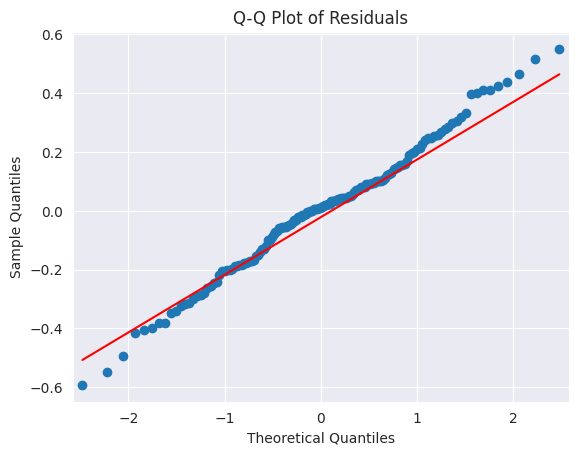

In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming X and y are your independent and dependent variables
model = sm.OLS(y, sm.add_constant(X))  # Add constant if needed, sm.add_constant(X) for example
results = model.fit()  # Fit the OLS model

# Now you can access the residuals and create the Q-Q plot
residuals = results.resid

# Create Q-Q plot
QQ_plot = sm.qqplot(residuals, line="q")

# Customize the plot (optional)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [37]:
import statsmodels.api as sm

# Assuming X and y are your independent and dependent variables
model = sm.OLS(y, X)
results = model.fit()  # Fit the OLS model


In [38]:
import statsmodels.api as sm

# Assuming X and y are your independent and dependent variables
X = sm.add_constant(X)  # Add constant if needed
model = sm.OLS(y, X)  # Create the OLS model

# Fit the model
results = model.fit()

# Access fitted values
fitted_values = results.fittedvalues

# Now you can use fitted_values in your analysis or visualization


In [39]:
# Access fitted values
fitted_values = results.fittedvalues
model = sm.OLS(y, X)
results = model.fit
results = model.fit()

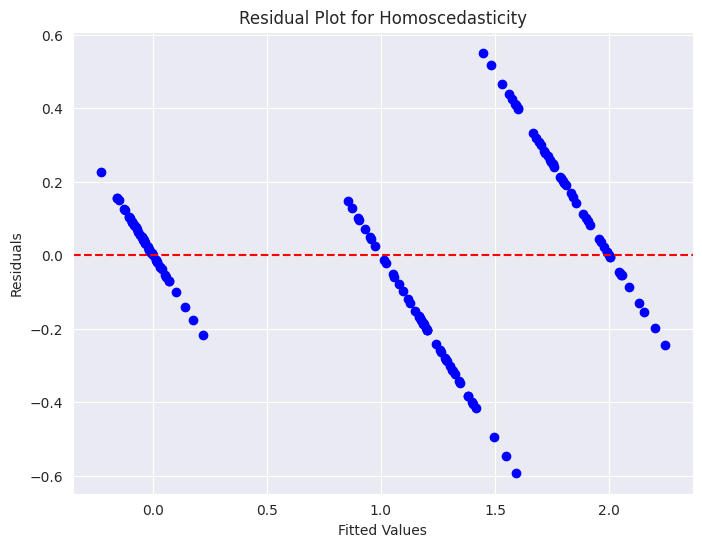

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()

In [41]:
import statsmodels.api as sm

# Assume `model` is your OLS model
# Fit the model
model_fit = model.fit()

# Access the fitted values
fitted_values = model_fit.fittedvalues


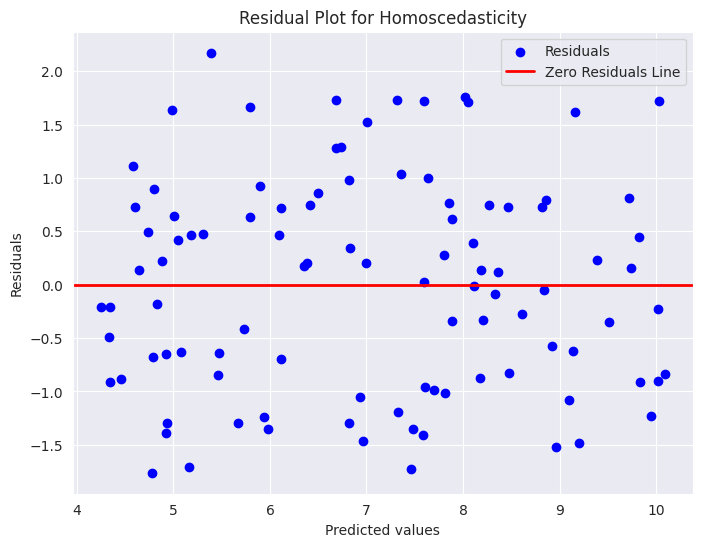

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate some example data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Make predictions
y_pred = lin_reg.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plotting the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', marker='o', label='Residuals')
plt.axhline(y=0, color='r', linestyle='-', linewidth=2, label='Zero Residuals Line')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.legend()
plt.show()


In [43]:
# Create an OLS model object
ols_model = sm.OLS(y, X)

# Fit the OLS model to the data
fitted_model = ols_model.fit()

# Access the influence object
influence = fitted_model.get_influence()

# Now you can use influence attributes and methods, e.g., Cook's Distance
cooks_distance = influence.cooks_distance[0]

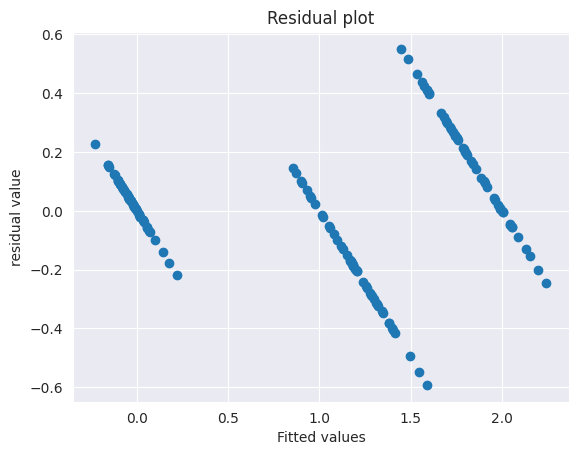

In [44]:
# Residual plot for homoscedasticity

model_fit.fittedvalues
model_fit.resid
plt.scatter(model_fit.fittedvalues,model_fit.resid)
plt.title("Residual plot")
plt.xlabel("Fitted values")
plt.ylabel("residual value")
plt.show()

In [45]:
import statsmodels.api as sm

# Assume `model` is your OLS model
# Fit the model
model_fit = model.fit()

# Access the influence object
influence = fitted_model.get_influence()

In [46]:
aduimport numpy as np
# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

influence = fitted_model.get_influence()
# Now you can use influence attributes and methods, e.g., Cook's Distance
cooks_distance = influence.cooks_distance[0]
(cooks , P_value) = influence.cooks_distance
(cooks , P_value)

(array([8.41887636e-04, 2.47062594e-04, 6.93522393e-04, 1.84615930e-03,
        7.65201666e-03, 7.12997737e-03, 5.97497523e-03, 1.72850911e-02,
        5.90036370e-02, 5.48800814e-03, 8.22493343e-03, 5.19005095e-03,
        5.45219412e-04, 4.92902916e-03, 4.25229425e-04, 7.23290443e-04,
        3.41152671e-05, 7.03796142e-04, 2.76414890e-03, 6.42193370e-03,
        1.02469835e-03, 2.30697663e-02, 7.21256847e-05, 1.36781410e-05,
        3.30759926e-04, 7.70907453e-03, 8.08417081e-04, 4.22464396e-02,
        1.00611676e-02, 7.59642001e-03, 6.75121327e-03, 2.50591827e-05,
        4.59034750e-05, 9.22497335e-03, 2.55165292e-05, 1.46066638e-03,
        2.13398764e-03, 3.77747395e-05, 1.13145591e-02, 7.37215879e-04,
        3.06241793e-03, 7.42425774e-06, 1.10445025e-04, 4.90381010e-04,
        2.50173117e-03, 5.74439704e-04, 1.20018657e-03, 2.32263744e-03,
        3.86542684e-03, 3.14708057e-03, 3.65806431e-04, 3.16396993e-03,
        5.36004437e-02, 6.57518596e-04, 9.87264718e-04, 1.910630

In [47]:
#index and value of influencer where c is more than 0.5
(np.argmax(cooks),np.max(cooks))

(8, 0.059003636972730436)

In [52]:
# High Influence points

from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

# Access the influence object
influence = fitted_model.get_influence()
fitted_model.get_influence
plt.show()

In [71]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = fitted_model.get_influence()
threshold = 2.0
influence_summary = influence.summary_frame()
high_influence_points = influence_summary[influence_summary['hat_diag'] > threshold]
high_influence_indices = high_influence_points.index
high_influence_indices          ##There are no high influence INDICES

Int64Index([], dtype='int64')

In [72]:
# Removing influencer points
df1[df1.index.isin([109])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,1.0,4,1,116,2000,5,5,283,1480


In [73]:
df1_new = df1
df1_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,23,46986,90,2000,3,5,210,1165
1,0.333925,23,72937,90,2000,3,5,210,1165
2,0.341030,24,41711,90,2000,3,5,210,1165
3,0.376554,26,48000,90,2000,3,5,210,1165
4,0.333925,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,0.111901,69,20544,86,1300,3,5,69,1025
1432,0.230728,72,19000,86,1300,3,5,69,1015
1433,0.147425,71,17016,86,1300,3,5,69,1015
1434,0.103020,70,16916,86,1300,3,5,69,1015


In [74]:
df1_new =df1_new.drop(["HP"],axis=1)    #Drop HP Having high collinearity
df1_new

,Price,Age_08_04,KM,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,23,46986,2000,3,5,210,1165
1,0.333925,23,72937,2000,3,5,210,1165
2,0.341030,24,41711,2000,3,5,210,1165
3,0.376554,26,48000,2000,3,5,210,1165
4,0.333925,30,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,0.111901,69,20544,1300,3,5,69,1025
1432,0.230728,72,19000,1300,3,5,69,1015
1433,0.147425,71,17016,1300,3,5,69,1015
1434,0.103020,70,16916,1300,3,5,69,1015


In [75]:
df1_new = df1_new.drop(df1_new.index[[109]],axis=0).reset_index()
df1_new    # High influence points

,index,Price,Age_08_04,KM,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,0.325044,23,46986,2000,3,5,210,1165
1,1,0.333925,23,72937,2000,3,5,210,1165
2,2,0.341030,24,41711,2000,3,5,210,1165
3,3,0.376554,26,48000,2000,3,5,210,1165
4,4,0.333925,30,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,1431,0.111901,69,20544,1300,3,5,69,1025
1431,1432,0.230728,72,19000,1300,3,5,69,1015
1432,1433,0.147425,71,17016,1300,3,5,69,1015
1433,1434,0.103020,70,16916,1300,3,5,69,1015


In [76]:
df1_new =df1_new.drop(["index"],axis=1)    #Drop newly created index column
df1_new

,Price,Age_08_04,KM,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,23,46986,2000,3,5,210,1165
1,0.333925,23,72937,2000,3,5,210,1165
2,0.341030,24,41711,2000,3,5,210,1165
3,0.376554,26,48000,2000,3,5,210,1165
4,0.333925,30,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1430,0.111901,69,20544,1300,3,5,69,1025
1431,0.230728,72,19000,1300,3,5,69,1015
1432,0.147425,71,17016,1300,3,5,69,1015
1433,0.103020,70,16916,1300,3,5,69,1015


In [77]:
# Split the variables x and y
y = df1_new["Price"]
#x =df1_new[['Age_08_04']]
#x =df1_new[['Age_08_04','Weight']]
x =df1_new[['Age_08_04','Weight','KM']]         ### Best model fit
y
x

,Age_08_04,Weight,KM
0,23,1165,46986
1,23,1165,72937
2,24,1165,41711
3,26,1165,48000
4,30,1170,38500
...,...,...,...
1430,69,1025,20544
1431,72,1015,19000
1432,71,1015,17016
1433,70,1015,16916


In [78]:
# Model fitting

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [79]:
# Model predicted values
y_pred = LR.predict(x)
y_pred

array([0.44820111, 0.42623698, 0.44836983, ..., 0.16701673, 0.17139725,
       0.22616782])

In [80]:
# Model evaluation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean square error ",mse.round(3))

import numpy as np
print("Root mean square error ", np.sqrt(mse).round(3))

Mean square error  0.002
Root mean square error  0.05


In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("r2_score",r2.round(3))

r2_score 0.846


## R2 values with cases with model improvement

#### (Case-1)         r2_score 0.772
#### (Case-2)         r2_score 0.804
#### (Case-3)         r2_score 0.846